In [1]:
######## Importing the necessary libraries #########


import pandas as pd
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline   

In [2]:
##### Fetching the cleaned FM transmitter data for the countries: CANADA, AUSTRALIA and GERMANY ####
#####  EIRP in Watts #####
##### Latitude ranges from 90(N.Pole) to 0 (EQUATOR) to -90(S.Pole) ########
##### Longitude ranges between 0 and 360 degree eastwards ############


#Reading the CSV file
df=pd.read_csv("/home/ghoshsonia/rfi/Final_Revised.csv")

#Removing the Null/missing values in the CSV file
df.dropna(subset = ["Latitude in degrees"], inplace=True)


#df.set_index("Area Served", inplace = True) # Set 'Area Served' column as index on a Dataframe
#df=df.loc[["Perth", "Perth City"]] # Using the operator .loc[] to select multiple rows from the Dataframe
df

,Latitude in degrees,Longitude in degrees,Frequency(MHz),EIRP
0,50.947181,8.532986,87.6,164000.0
1,53.509289,10.093932,87.6,131200.0
2,49.832397,9.592726,87.6,41000.0
3,49.629033,7.820645,87.6,820.0
4,49.681928,7.327415,87.6,328.0
...,...,...,...,...
14102,-25.234722,130.991944,99.7,524.8
14103,-25.234722,130.991944,100.5,524.8
14104,-25.234722,130.991944,102.1,328.0
14105,-25.234722,130.991944,105.3,656.0


In [3]:
np.shape(df)

(13195, 4)

In [6]:
###### User defined frequency axis ######################
fstart=87
fstop=108
fres=0.5
freq=np.arange(fstart,fstop,fres)

#### Array consisting of frequencies from the dataset
data_freq=df['Frequency(MHz)'].values



diff=np.zeros((len(data_freq),len(freq)),dtype=object)
freq_arr=np.zeros(len(data_freq))


for i in range(len(data_freq)):
    for j in range(len(freq)):
        diff[i][j]=abs(data_freq[i]-freq[j])
        freq_arr[i]=freq[np.argmin(diff[i])]

In [7]:
freq

array([ 87. ,  87.5,  88. ,  88.5,  89. ,  89.5,  90. ,  90.5,  91. ,
        91.5,  92. ,  92.5,  93. ,  93.5,  94. ,  94.5,  95. ,  95.5,
        96. ,  96.5,  97. ,  97.5,  98. ,  98.5,  99. ,  99.5, 100. ,
       100.5, 101. , 101.5, 102. , 102.5, 103. , 103.5, 104. , 104.5,
       105. , 105.5, 106. , 106.5, 107. , 107.5])

In [8]:
df['New Frequency']=freq_arr
df

,Latitude in degrees,Longitude in degrees,Frequency(MHz),EIRP,New Frequency
0,50.947181,8.532986,87.6,164000.0,87.5
1,53.509289,10.093932,87.6,131200.0,87.5
2,49.832397,9.592726,87.6,41000.0,87.5
3,49.629033,7.820645,87.6,820.0,87.5
4,49.681928,7.327415,87.6,328.0,87.5
...,...,...,...,...,...
14102,-25.234722,130.991944,99.7,524.8,99.5
14103,-25.234722,130.991944,100.5,524.8,100.5
14104,-25.234722,130.991944,102.1,328.0,102.0
14105,-25.234722,130.991944,105.3,656.0,105.5


In [9]:
#Resolution of the map
print('-----------Resolution of the map---------') 
nside = 32
print("The number of pixels for the given NSIDE: " + str(hp.nside2npix(nside)))
print("Approximate resolution in degrees for given nside: " + str(np.degrees(hp.nside2resol(nside))))
print( "Pixel area: %.2f square degrees" % hp.nside2pixarea(nside, degrees=True))



-----------Resolution of the map---------
The number of pixels for the given NSIDE: 12288
Approximate resolution in degrees for given nside: 1.8322594196359498
Pixel area: 3.36 square degrees


In [10]:

######-------------------Allocating Pixel number to the Latitude and Longitude of each Tx in the CSV---------#######



# Healpy pixel number when input angles are assumed to be longitude and latitude in degrees
pixel_indices = hp.ang2pix(nside, df['Longitude in degrees'].to_numpy() ,df['Latitude in degrees'].to_numpy(),lonlat=True)
df['Pixel_number']=pixel_indices 
print(pixel_indices)

df

[1302 1106 1406 ... 8686 8686 8821]


,Latitude in degrees,Longitude in degrees,Frequency(MHz),EIRP,New Frequency,Pixel_number
0,50.947181,8.532986,87.6,164000.0,87.5,1302
1,53.509289,10.093932,87.6,131200.0,87.5,1106
2,49.832397,9.592726,87.6,41000.0,87.5,1406
3,49.629033,7.820645,87.6,820.0,87.5,1406
4,49.681928,7.327415,87.6,328.0,87.5,1406
...,...,...,...,...,...,...
14102,-25.234722,130.991944,99.7,524.8,99.5,8686
14103,-25.234722,130.991944,100.5,524.8,100.5,8686
14104,-25.234722,130.991944,102.1,328.0,102.0,8686
14105,-25.234722,130.991944,105.3,656.0,105.5,8686


In [11]:
#######---------------Conversion of the pixel numbers w.r.t the given NSIDE to corresponding angular coordinates--------#######


NPIX = hp.nside2npix(nside) # Storing the number of pixels of the map corresponding to the given NSIDE
arr=np.arange(NPIX) #Create an an array of pixel numbers with respect to the NSIDE

theta, phi = (hp.pix2ang(nside, ipix=arr,lonlat=True)) # Array of the angular coordinates co-latitude(theta) 
                                                        #and longitude(phi) in degrees 
                                                       # With respect to the given NSIDE


In [12]:
#######------------------Altitudes of the satellite orbit--------####


#Creating user defined data points between 400 km to 36000 km in log scale
data_point=int(input("Enter number of data points : "))
altitude= np.logspace(np.log10(400),np.log10(36000),data_point) 
print(altitude)

Enter number of data points : 3
[  400.         3794.7331922 36000.       ]


In [13]:
###########----------------- Calculation of Field of view of the satellite---------#######
###########-----------------Considering Nadir-pointing Field of View Geometry-------######
##########-----------------Considering the FOV of the satellite to be tangent to the surface of the Earth------######


FOV=np.zeros(len(altitude))
for i in range(0,len(altitude)):
# Consider a case of full coverage under elevation of 0 º
    Rad= 6371 # Mean radius of Earth in km
    FOV[i]= 2*np.arcsin(Rad/(Rad+ altitude[i]))  # Field of view for maximal coverage in radians when elevation is 0 º 
    print(" The Field of view of the satellite at a height of",altitude[i],"km is",FOV[i], "radians")

 The Field of view of the satellite at a height of 400.0000000000001 km is 2.4507006996152447 radians
 The Field of view of the satellite at a height of 3794.733192202054 km is 1.3546564445594882 radians
 The Field of view of the satellite at a height of 35999.99999999996 km is 0.30186940950576446 radians


In [15]:
###########----------------- Calculation of the radius of the FOV of the satellite---------#######



# The surface of the coverage area of the Earth depends on the central angle
Central_angle=np.zeros(len(altitude))
for i in range(0,len(altitude)):
    Central_angle[i]=np.arccos(Rad/(Rad+altitude[i])) # Central angle in radians
    
    Dia_of_FOV=2*Central_angle*Rad  # Diameter of the FOV (disc on the Earth's surface)in km
    Rad_of_FOV= Dia_of_FOV/2 # Radius of the FOV in km
    Rad_of_FOV=Rad_of_FOV/Rad  # Radius of the FOV in Radians
    print(" The Radius of the Field of View for a height of",altitude[i],"km in radians is",Rad_of_FOV[i])
len(Rad_of_FOV)

 The Radius of the Field of View for a height of 400.0000000000001 km in radians is 0.3454459769872743
 The Radius of the Field of View for a height of 3794.733192202054 km in radians is 0.8934681045151526
 The Radius of the Field of View for a height of 35999.99999999996 km in radians is 1.4198616220420144


3

In [16]:
###############-----Storing indices of the pixel number that are inside the circle/disc(FOV) wrt the altitude-----------######


vec1 = hp.ang2vec(theta,phi,lonlat=True) #Using ang2vec convert angles that is co-latitude and longitude in radians
                                        #to 3D position vector
    
disc=np.zeros((len(arr),len(Rad_of_FOV)),dtype=object)#Array of indices of the pixel number that are inside the 
                                                      #circle/disc specified by vec and radius
def pixel_disc(a,b):
    for i in range(len(a)):
        for j in range(len(b)):
            disc[j][i]=hp.query_disc(nside, vec1[j], radius=a[i])
pixel_disc(Rad_of_FOV,arr)

In [17]:
#########------- Cross checking the array being created-----#########

df1 = pd.DataFrame(disc)
df1

,0,1,2
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
...,...,...,...
12283,"[11808, 11809, 11858, 11859, 11860, 11861, 118...","[9792, 9793, 9794, 9795, 9796, 9797, 9798, 979...","[6720, 6832, 6833, 6834, 6835, 6836, 6837, 683..."
12284,"[11868, 11869, 11870, 11871, 11872, 11873, 118...","[9920, 9921, 9922, 9923, 9924, 9925, 9926, 992...","[6976, 6977, 6978, 6979, 6980, 6981, 6982, 698..."
12285,"[11880, 11881, 11882, 11883, 11884, 11885, 118...","[9938, 9939, 9940, 9941, 9942, 9943, 9944, 994...","[6996, 6997, 6998, 6999, 7000, 7001, 7002, 700..."
12286,"[11894, 11895, 11896, 11897, 11898, 11899, 119...","[9970, 9971, 9972, 9973, 9974, 9975, 9976, 997...","[7028, 7029, 7030, 7031, 7032, 7033, 7034, 703..."


In [18]:
######-----Storing indices of the pixel number that are common between the FOV disc and the satellite pixel no------####


Comm_pix=np.zeros((len(disc[:,i]),len(Rad_of_FOV)),dtype=object)

for i in range(len(Rad_of_FOV)):
    for k in range(len(disc[:,i])):
     

         Comm_pix[k][i]=np.intersect1d(pixel_indices,disc[k][i])#Array of indices of the pixel number that are
                                                           #common between the FOV disc and the satellite pixel no
         

In [19]:
#########------- Cross checking the array being created-----#########


df2 = pd.DataFrame(Comm_pix)
df2

,0,1,2
0,"[209, 253, 301]","[209, 253, 301, 352, 399, 400, 401, 403, 405, ...","[209, 253, 301, 352, 399, 400, 401, 403, 405, ..."
1,"[209, 253, 301]","[209, 253, 301, 352, 399, 400, 401, 403, 405, ...","[209, 253, 301, 352, 399, 400, 401, 403, 405, ..."
2,"[209, 253, 301, 352, 399, 400, 401, 403, 405, ...","[209, 253, 301, 352, 399, 400, 401, 403, 405, ...","[209, 253, 301, 352, 399, 400, 401, 403, 405, ..."
3,"[209, 253, 301, 352, 405, 407, 409]","[209, 253, 301, 352, 399, 400, 401, 403, 405, ...","[209, 253, 301, 352, 399, 400, 401, 403, 405, ..."
4,"[209, 253, 301]","[209, 253, 301, 352, 399, 400, 401, 403, 405, ...","[209, 253, 301, 352, 399, 400, 401, 403, 405, ..."
...,...,...,...
12283,[],"[10227, 10228, 10354]","[6947, 7394, 7406, 7407, 7408, 7410, 7533, 753..."
12284,[],"[10099, 10100, 10227, 10228, 10354]","[7141, 7154, 7155, 7279, 7283, 7394, 7406, 740..."
12285,[],"[9970, 9971, 9972, 10099, 10100, 10227, 10228,...","[7141, 7154, 7155, 7279, 7283, 7394, 7406, 740..."
12286,[],"[9970, 9971, 9972, 10099, 10100, 10227, 10228,...","[7141, 7154, 7155, 7279, 7283, 7394, 7406, 740..."


In [22]:
######--- Initializing the array to store the pixel number that are common between the FOV disc ---####
######                        and the satellite pixel no    ######


### THIS CELL NEEDS TO BE CORRECTED ###
### ALERT: Once executed it will show error 
##           Move on and execute the next cell which will again show an error
##           Come back execute this cell again and then execute the next cell


Comm_TX=np.zeros((len(Comm_pix[:,j]),len(Rad_of_FOV)),dtype=object)
found_common=np.zeros(( len(Comm_pix[:,j]),len(Rad_of_FOV)),dtype=object)

In [23]:
######-----Storing indices of the pixel number that are common between the FOV disc and the satellite pixel no ------#
######-----And the same pixel number of the transmitters-----##

#Comm_TX=np.zeros((len(Comm_pix[:,j]),len(Rad_of_FOV)),dtype=object)
#found_common=np.zeros(( len(Comm_pix[:,j]),ln(Comm_pix[:,j])en(Rad_of_FOV)),dtype=object)

for j in range(len(Rad_of_FOV)):
    for i in range(len(Comm_pix[:,j])):
        Comm_TX[i][j]=set(Comm_pix[i][j])
        found_common[i][j] = [l for l in pixel_indices if l in Comm_TX[i][j]]#Array of indices of the pixel number that 
                                                    #are common between the FOV disc and the satellite pixel no with
                                                    # Tx having same pixel number
                                                                       
         

In [24]:
#########------- Cross checking the array being created-----#########

df3 = pd.DataFrame(found_common)
df3

,0,1,2
0,"[253, 301, 209]","[1302, 1106, 1406, 1406, 1406, 1300, 1406, 140...","[1302, 1106, 1406, 1406, 1406, 1300, 1406, 140..."
1,"[253, 301, 209]","[1302, 1106, 1406, 1406, 1406, 1300, 1406, 140...","[1302, 1106, 1406, 1406, 1406, 1300, 1406, 140..."
2,"[401, 400, 399, 253, 403, 403, 403, 407, 301, ...","[1302, 1106, 1406, 1406, 1406, 1300, 1406, 140...","[1302, 1106, 1406, 1406, 1406, 1300, 1406, 140..."
3,"[253, 409, 407, 301, 209, 405, 405, 352, 405, ...","[1302, 1106, 1406, 1406, 1406, 1300, 1406, 140...","[1302, 1106, 1406, 1406, 1406, 1300, 1406, 140..."
4,"[253, 301, 209]","[1302, 1106, 1406, 1406, 1406, 1300, 1406, 140...","[1302, 1106, 1406, 1406, 1406, 1300, 1406, 140..."
...,...,...,...
12283,[],"[10228, 10228, 10228, 10354, 10354, 10354, 103...","[9971, 6947, 9971, 9713, 9713, 9713, 9713, 971..."
12284,[],"[10100, 10100, 10100, 10228, 10228, 10228, 101...","[9971, 9971, 9713, 9713, 9713, 9713, 9713, 971..."
12285,[],"[9971, 9971, 9971, 9971, 9971, 9971, 9971, 997...","[9971, 9971, 9713, 9713, 9713, 9713, 9713, 971..."
12286,[],"[9971, 9971, 9971, 9971, 9971, 9971, 9971, 997...","[9971, 9971, 9713, 9713, 9713, 9713, 9713, 971..."


In [25]:
#######-------Store the values of the received power in Watt,dBm and Kelvin wrt altitude----#####
######------- Calculation of the received power using Friis Transmission Equation--------#######
######-------Considering isotropic transmitter and receiver with gain =1 -------------#########





res=fres*1e6 #Bandwidth
Rx_Power= np.zeros((len(df),len(altitude)))
Rx_Power_in_Kelvin=np.zeros((len(df),len(altitude)))
for i in range(0,len(altitude)):
    for j in range(0,len(df)):
        wavelength= (3*1e8)/(df.iloc[j]['Frequency(MHz)']*1e6)
        Rx_Power[j][i]= ((df.iloc[j]['EIRP'])*(wavelength)**2)/(4*np.pi*altitude[i])**2 #the Friis Transmission Equation
        
        Rx_Power_in_Kelvin[j][i]=Rx_Power[j][i]/(1.38*1e-23*res)#in Kelvin
        #df9[j][i]=pd.DataFrame(Rx_Power_in_Kelvin[j][i])

In [26]:
##### ---Create dataframe to store the values of the received power in Kelvin w.r.t the altitude----#####

##### The first three columns of the dataframe indicate the altitude [0=400 km, 1= 3794 km , 2= 36000 km ] #####
##### The column will vary with the user input for the number of altitudes ######

df_data=pd.DataFrame(Rx_Power_in_Kelvin)
df_data['Pixel_number']=pixel_indices
df_data['New Frequency']=freq_arr


df_data

,0,1,2,Pixel_number,New Frequency
0,1.103289e+16,1.225877e+14,1.362085e+12,1302,87.5
1,8.826313e+15,9.807015e+13,1.089668e+12,1106,87.5
2,2.758223e+15,3.064692e+13,3.405213e+11,1406,87.5
3,5.516446e+13,6.129384e+11,6.810427e+09,1406,87.5
4,2.206578e+13,2.451754e+11,2.724171e+09,1406,87.5
...,...,...,...,...,...
13190,2.725569e+13,3.028410e+11,3.364900e+09,8686,99.5
13191,2.682350e+13,2.980389e+11,3.311543e+09,8686,100.5
13192,1.624337e+13,1.804819e+11,2.005354e+09,8686,102.0
13193,3.054223e+13,3.393582e+11,3.770646e+09,8686,105.5


In [29]:
######--- Initializing the array to store the dataframes for the FOV for each pixel position of the satellite #####
######            at different altitudes   ######


##### THE CELL NEEDS TO BE CORRECTED  #####
### ALERT: Once executed it will show error 
##           Move on and execute the next cell which will again show an error
##           Come back execute this cell again and then execute the next cell


df_1=np.zeros((len(found_common[:,j]),len(Rad_of_FOV)),dtype=object)

In [30]:
#########  Create dataframes for the FOV for each pixel position of the satellite at different altitudes #######



#df_1=np.zeros((len(found_common[:,j]),len(Rad_of_FOV)),dtype=object)
for j in range(len(Rad_of_FOV)):
    for i in range(len(found_common[:,j])):
        df_1[i][j]= df_data.loc[df_data['Pixel_number'].isin(found_common[i][j])]
        df_1[i][j]= df_1[i][j].groupby(['New Frequency']).sum()  # df9['Pixel_number']= Column consisting of 
        df_1[i][j]= df_1[i][j].reset_index()                                                 #the values of pixel number of the transmitters 
                                                                    #based on the resolution of the map
        
        
       
#df_1.drop['Pixel_number']

In [28]:
# Dataframe showing the pixel numbers(or Transmitters with their respective operating frequency)in the
# FOV of the satellite at an altitude 400 km when overhead pixel position(or number) 0
    
       # First 0 indicate the pixel position(or number)
       # Second 0 indicate the altitude [0=400 km, 1= 3794 km , 2= 36000 km ]



df_1[0][0]

,New Frequency,0,1,2,Pixel_number
0,105.0,1.287661e+13,1.430734e+11,1.589704e+09,510
1,107.0,0.000000e+00,0.000000e+00,0.000000e+00,253


In [29]:
# Dataframe showing the pixel numbers(or Transmitters with their respective operating frequency)in the
# FOV of the satellite at an altitude 400 km when overhead pixel position(or number) 2
    

df_1[2][0]

,New Frequency,0,1,2,Pixel_number
0,90.0,1.045235e+13,1.161373e+11,1.290414e+09,757
1,90.5,4.464682e+12,4.960758e+10,5.511953e+08,405
2,97.5,2.749604e+12,3.055115e+10,3.394573e+08,403
3,98.5,7.184629e+12,7.982922e+10,8.869913e+08,405
4,100.0,4.241667e+13,4.712963e+11,5.236626e+09,798
5,100.5,8.349080e+11,9.276755e+09,1.030751e+08,399
6,102.0,8.968956e+12,9.965506e+10,1.107278e+09,403
7,105.0,3.127176e+13,3.474640e+11,3.860711e+09,2126
8,107.0,5.904846e+11,6.560940e+09,7.289934e+07,653


In [31]:
# Dataframe showing the pixel numbers(or Transmitters with their respective operating frequency)in the
# FOV of the satellite at an altitude 3794 km when overhead pixel position(or number) 0
    

df_1[0][1]

,New Frequency,0,1,2,Pixel_number
0,87.5,3.720320e+16,4.133689e+14,4.592988e+12,53605
1,88.0,3.366773e+17,3.740859e+15,4.156510e+13,395103
2,88.5,5.640744e+17,6.267494e+15,6.963882e+13,688270
3,89.0,2.979288e+17,3.310320e+15,3.678134e+13,432092
4,89.5,4.121095e+17,4.578995e+15,5.087772e+13,605723
5,90.0,2.880004e+17,3.200005e+15,3.555561e+13,520066
6,90.5,3.629132e+17,4.032369e+15,4.480410e+13,576173
7,91.0,3.024825e+17,3.360917e+15,3.734352e+13,467596
8,91.5,3.255271e+17,3.616968e+15,4.018853e+13,661434
9,92.0,2.910558e+17,3.233953e+15,3.593281e+13,481077


In [33]:
## Initializing the 3D array to store the received power for each pixel, each frequency and at different altitudes ###

power_output=np.zeros((len(Rad_of_FOV),NPIX,len(freq)),dtype=object)


In [34]:
## Create the 3D array to store the received power for each pixel, each frequency and at different altitudes ##
## k: loops along the length of the number of altitude
## m: loops along the length of the number of pixels based on the given NSIDE
## l: loops along the length of the number of frequencies in the frequency axis defined by user


for k in range(len(Rad_of_FOV)):
    for m in range(NPIX):    
        for l in range(len(freq)):
            if (df_1[m][k][k][df_1[m][k]['New Frequency'] == freq[l]].values).size==0:# checking for empty dataframes
                power_output[k][m][l]=0
            else: 
                power_output[k][m][l]=float(df_1[m][k][k][df_1[m][k]['New Frequency'] == freq[l]].values)
           
        

In [35]:
##Received power by the satellite at an altitude 400 km when overhead pixel position(or number) 0 at all frequencies##

power_output[0,0,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12876605953099.73, 0, 0,
       0, 0.0, 0], dtype=object)

Text(0.5, 0.98, 'Power spectrum for pixel 0 at an altitude of 400 km')

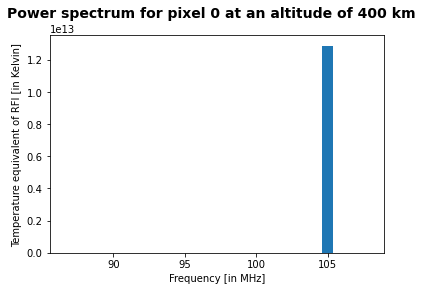

In [45]:
##Power spectrum for pixel 1 at an altitude of 400 km

plt.bar(freq,power_output[0,0,:]) 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Temperature equivalent of RFI [in Kelvin]')
plt.suptitle('Power spectrum for pixel 0 at an altitude of 400 km',fontsize=14, fontweight="bold")

In [36]:
##Received power by the satellite at an altitude 400 km when overhead pixel position(or number) 2 at all frequencies##

power_output[0,2,:]

array([0, 0, 0, 0, 0, 0, 10452354859040.04, 4464681790228.062, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2749603819717.3022, 0,
       7184629427245.644, 0, 0, 42416671320016.08, 834907985591.3741, 0,
       0, 8968955581623.75, 0, 0, 0, 0, 0, 31271757314670.773, 0, 0, 0,
       590484635078.221, 0], dtype=object)

Text(0.5, 0.98, 'Power spectrum for pixel 2 at an altitude of 400 km')

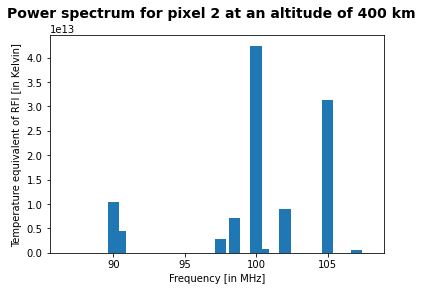

In [46]:
##Power spectrum for pixel 2 at an altitude of 400 km

plt.bar(freq,power_output[0,2,:]) 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Temperature equivalent of RFI [in Kelvin]')
plt.suptitle('Power spectrum for pixel 2 at an altitude of 400 km',fontsize=14, fontweight="bold")

In [38]:
##Received power by the satellite at an altitude 3794 km when overhead pixel position(or number) 0 at all frequencies##

power_output[1,0,:]

array([0, 413368940932702.44, 3740858652228731.0, 6267493711938763.0,
       3310320285451945.0, 4578994935651991.0, 3200004967885939.5,
       4032369131867258.0, 3360916683864593.0, 3616967755910359.5,
       3233953024119492.5, 3465613558498054.5, 2397160280463756.5,
       2640361823639671.5, 2260375177133407.5, 4100979943630457.0,
       2552036311896121.0, 3455440453228389.0, 2350818887525230.5,
       3678910744694117.0, 1891668322161757.0, 3160668933288696.0,
       2430432309587723.0, 3225393948257697.5, 2433733645718487.5,
       2365686257849127.0, 2447720241066821.0, 3189426952488858.5,
       2248424865874422.0, 2467894491043808.0, 1960876113334884.8,
       2892924536551601.0, 1935705543076308.8, 2792215025675844.0,
       2516459960908361.5, 2432290432074550.5, 2288061274615090.5,
       3229618311961656.5, 2179827623094633.2, 2428987588708040.0,
       1786423937807859.5, 3704295506137765.0], dtype=object)

Text(0.5, 0.98, 'Power spectrum for pixel 0 at an altitude of 3794 km')

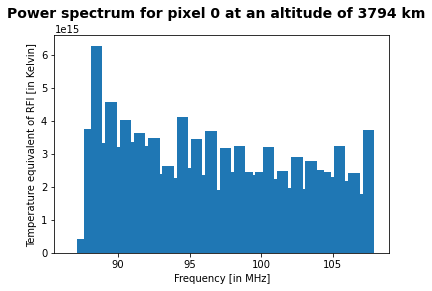

In [47]:
##Power spectrum for pixel 0 at an altitude of 3794 km

plt.bar(freq,power_output[1,0,:]) 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Temperature equivalent of RFI [in Kelvin]')
plt.suptitle('Power spectrum for pixel 0 at an altitude of 3794 km',fontsize=14, fontweight="bold")

In [40]:
##Received power by the satellite at an altitude 36000 km when overhead pixel position(or number) 0 at all frequencies##

power_output[2,0,:]

array([0, 4592988232585.592, 43329231946891.945, 70052160406042.086,
       36866960706231.57, 51530496813474.8, 35555610754288.28,
       45518767933509.58, 37659764519043.14, 41199773247618.24,
       36007067586626.41, 38506817316645.14, 27008944845673.62,
       29937723970962.54, 25115279745926.79, 45566443818116.19,
       28425594627601.992, 38393782813648.82, 26120209861391.484,
       40876786052156.85, 21018536912908.434, 35118543703207.78,
       27004803439863.62, 35837710536196.72, 27041484952427.676,
       26549343577262.23, 27520266295126.07, 35438077249876.23,
       24982498509715.83, 27421049900486.832, 21787512370387.664,
       32452248204042.695, 21507839367514.582, 31269490599226.742,
       27960666232315.156, 27083098695591.824, 25422903051278.82,
       35884647910685.13, 24220306923273.76, 27044043274987.965,
       19849154864531.793, 41158838957086.31], dtype=object)

Text(0.5, 0.98, 'Power spectrum for pixel 0 at an altitude of 36000 km')

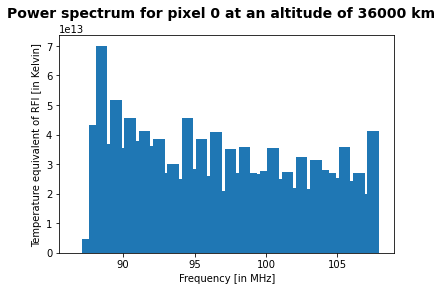

In [48]:
##Power spectrum for pixel 0 at an altitude of 36000 km #####

plt.bar(freq,power_output[2,0,:]) 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Temperature equivalent of RFI [in Kelvin]')
plt.suptitle('Power spectrum for pixel 0 at an altitude of 36000 km',fontsize=14, fontweight="bold")

In [49]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 400 km at 90 MHz----------------------#######

test_plot = np.zeros(hp.nside2npix(nside))
test_plot[0:np.size(power_output[0,:,6])] = power_output[0,:,6]


0.0 180.0 -180.0 180.0


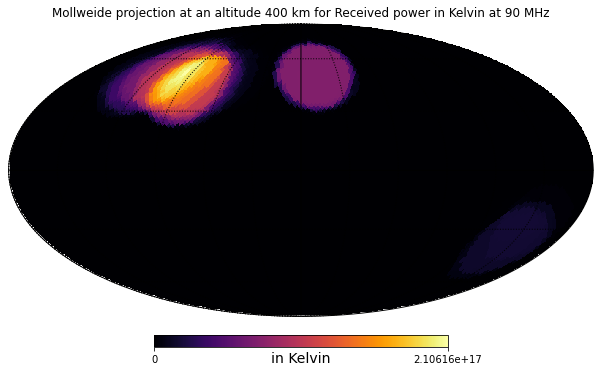

In [50]:
hp.mollview(test_plot,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [51]:
# Replacing the power value of 0 to a minimum value 1.000001 in order to apply logarithmic equalization in 
# the Healpy map


power_output_log=np.where(power_output[0,:,6]==0, 1.0000001, power_output[0,:,6])
np.shape(power_output_log)

(12288,)

In [52]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 400 km at 90 MHz with logarithmic equalization----------------------#######


test_plot12 = np.zeros(hp.nside2npix(nside))
test_plot12[0:np.size(power_output[0,:,6])] = power_output_log
test_plot12=np.where(test_plot12==0, 1.0000001,test_plot12 )

0.0 180.0 -180.0 180.0


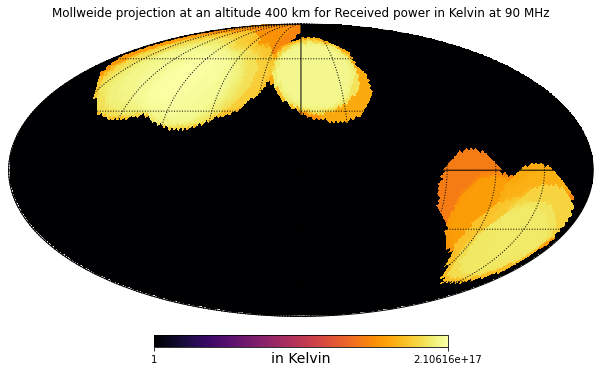

In [53]:
hp.mollview(test_plot12,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo',norm="log")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [54]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 400 km at 100 MHz----------------------#######


test_plot1 = np.zeros(hp.nside2npix(nside))
test_plot1[0:np.size(power_output[0,:,26])] = power_output[0,:,26]


0.0 180.0 -180.0 180.0


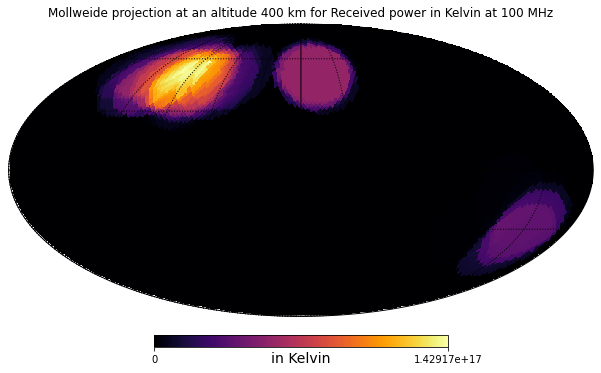

In [55]:
hp.mollview(test_plot1,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 100 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [56]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 3794 km at 90 MHz----------------------#######


test_plot4 = np.zeros(hp.nside2npix(nside))
test_plot4[0:np.size(power_output[1,:,6])] = power_output[1,:,6]

0.0 180.0 -180.0 180.0


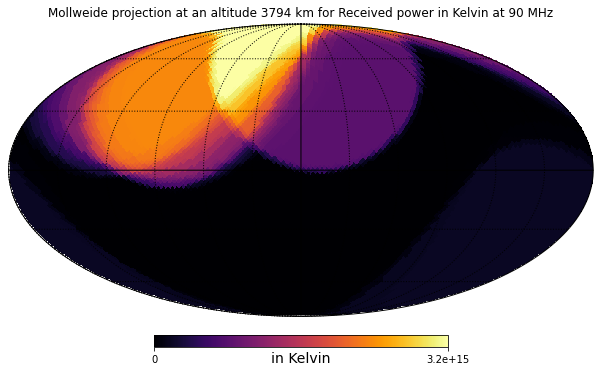

In [57]:
hp.mollview(test_plot4,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3794 km for Received power in Kelvin at 90 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [58]:
# Replacing the power value of 0 to a minimum value 1.000001 in order to apply logarithmic equalization in 
# the Healpy map


power_output_log1=np.where(power_output[1,:,6]==0, 1.0000001, power_output[1,:,6])
np.shape(power_output_log1)

(12288,)

In [59]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 3794 km at 90 MHz with logarithmic equalization----------------------#######


test_plot13 = np.zeros(hp.nside2npix(nside))
test_plot13[0:np.size(power_output[1,:,6])] = power_output_log1
test_plot13=np.where(test_plot13==0, 1.0000001,test_plot13 )

0.0 180.0 -180.0 180.0


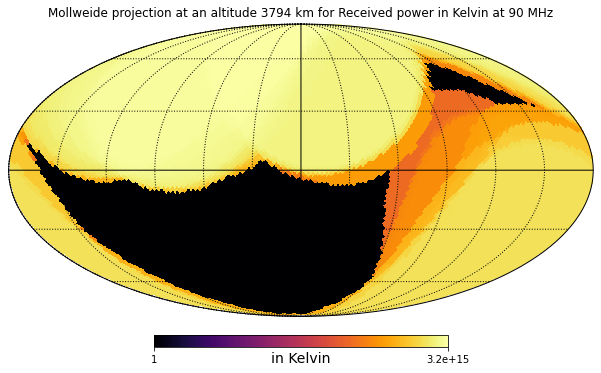

In [60]:
hp.mollview(test_plot13,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3794 km for Received power in Kelvin at 90 MHz",flip='geo',norm="log")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [61]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 3794 km at 100 MHz----------------------#######


test_plot2 = np.zeros(hp.nside2npix(nside))
test_plot2[0:np.size(power_output[1,:,26])] = power_output[1,:,26]


0.0 180.0 -180.0 180.0


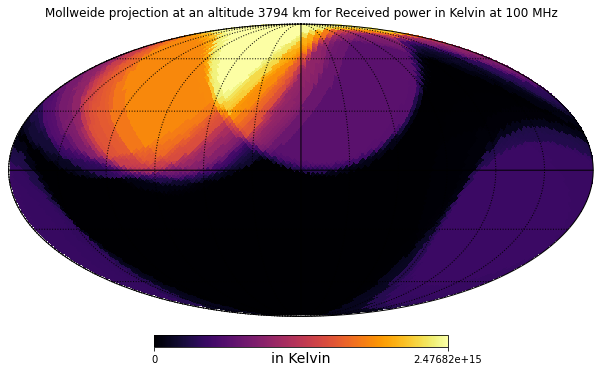

In [62]:
hp.mollview(test_plot2,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3794 km for Received power in Kelvin at 100 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [63]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 36000 km at 90 MHz----------------------#######


test_plot5 = np.zeros(hp.nside2npix(nside))
test_plot5[0:np.size(power_output[2,:,6])] = power_output[2,:,6]

0.0 180.0 -180.0 180.0


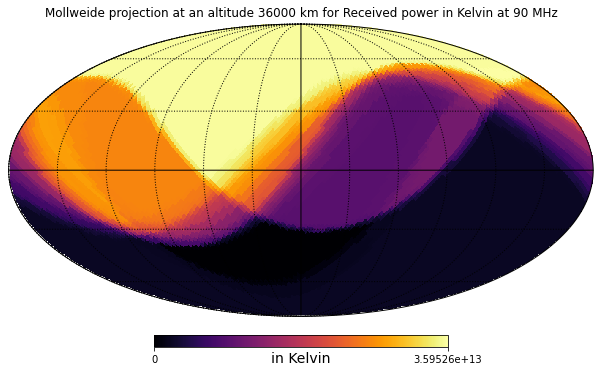

In [64]:
hp.mollview(test_plot5,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 36000 km for Received power in Kelvin at 90 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [65]:
# Replacing the power value of 0 to a minimum value 1.000001 in order to apply logarithmic equalization in 
# the Healpy map


power_output_log2=np.where(power_output[2,:,6]==0, 1.0000001, power_output[2,:,6])
np.shape(power_output_log2)

(12288,)

In [66]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 36000 km at 90 MHz with logarithmic equalization----------------------#######


test_plot14 = np.zeros(hp.nside2npix(nside))
test_plot14[0:np.size(power_output[2,:,6])] = power_output_log2
test_plot14=np.where(test_plot14==0, 1.0000001,test_plot14 )

0.0 180.0 -180.0 180.0


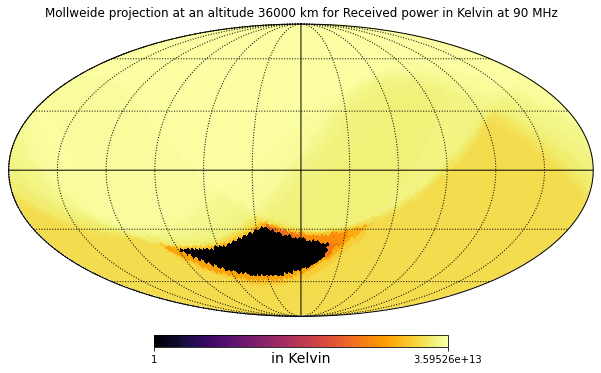

In [67]:
hp.mollview(test_plot14,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 36000 km for Received power in Kelvin at 90 MHz",flip='geo',norm="log")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [61]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 36000 km at 100 MHz----------------------#######


test_plot3 = np.zeros(hp.nside2npix(nside))
test_plot3[0:np.size(power_output[2,:,26])] = power_output[2,:,26]


0.0 180.0 -180.0 180.0


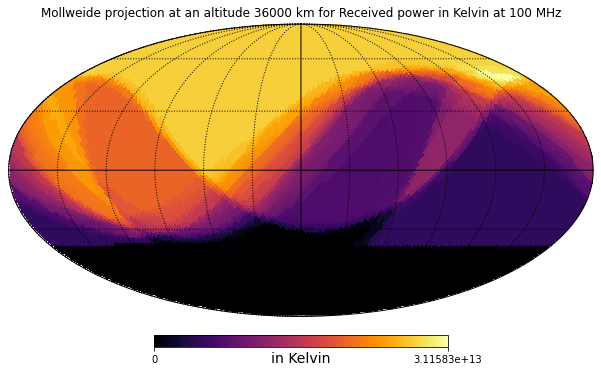

In [62]:
hp.mollview(test_plot3,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 36000 km for Received power in Kelvin at 100 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()